In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo dos gráficos
sns.set(style='whitegrid', palette='muted')
%matplotlib inline

# Carregar os dados
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Informações sobre os dados
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  

T

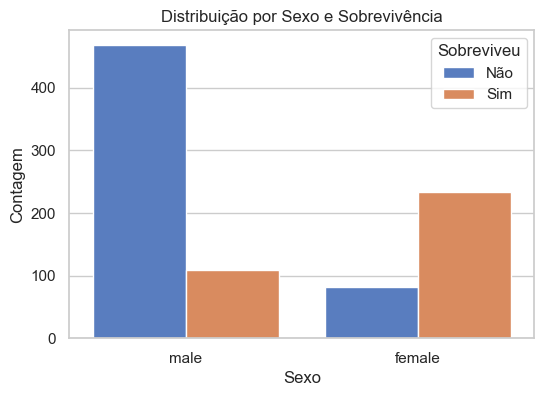

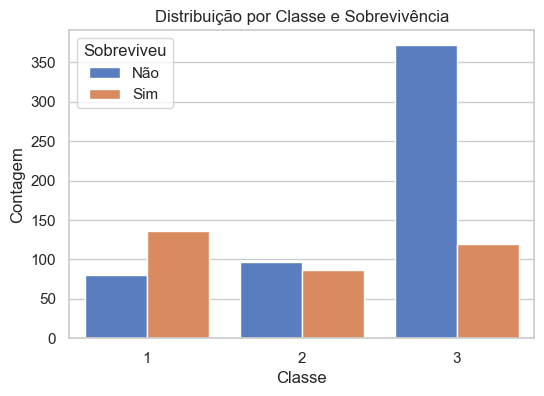

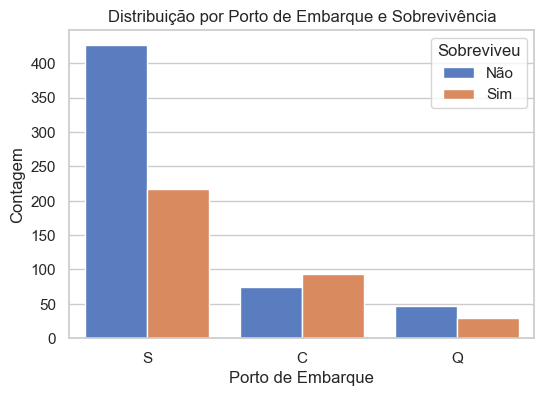

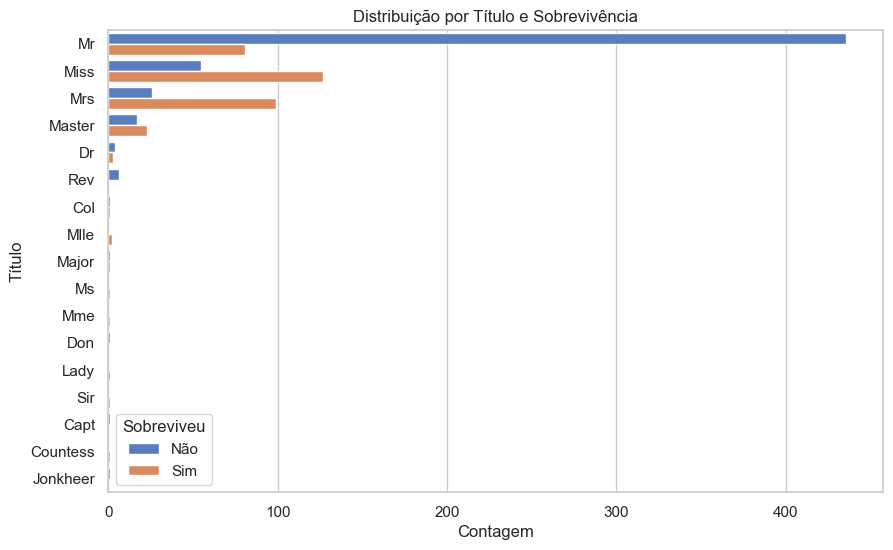

In [24]:
# Visualizar as primeiras linhas do DataFrame (opcional)
print(train.head())

# Extrair título do nome
train['Title'] = train['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# Lista de variáveis categóricas
categorical_vars = ['Sex', 'Pclass', 'Embarked', 'Title']

# Criar um DataFrame vazio para armazenar os resultados
summary_tables = []

for var in categorical_vars:
    counts = train[var].value_counts().reset_index()
    counts.columns = ['Category', 'Count']
    counts['Variable'] = var
    counts = counts[['Variable', 'Category', 'Count']]
    summary_tables.append(counts)

# Concatenar todas as tabelas
final_summary = pd.concat(summary_tables, ignore_index=True)

# Exibir a tabela final
print("\nTabela Resumida das Variáveis Categóricas:")
print(final_summary)

# **Visualização (Opcional)**

# Gráfico de Distribuição por Sexo com Sobrevivência
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=train)
plt.title('Distribuição por Sexo e Sobrevivência')
plt.xlabel('Sexo')
plt.ylabel('Contagem')
plt.legend(title='Sobreviveu', labels=['Não', 'Sim'])
plt.savefig('Distribuiçã0_Sexo_Sobrevivência.png')
plt.show()

# Gráfico de Distribuição por Classe com Sobrevivência
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title('Distribuição por Classe e Sobrevivência')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.legend(title='Sobreviveu', labels=['Não', 'Sim'])
plt.savefig('Distribuição_Classe_Sobrevivência.png')
plt.show()

# Gráfico de Distribuição por Porto de Embarque com Sobrevivência
plt.figure(figsize=(6, 4))
sns.countplot(x='Embarked', hue='Survived', data=train)
plt.title('Distribuição por Porto de Embarque e Sobrevivência')
plt.xlabel('Porto de Embarque')
plt.ylabel('Contagem')
plt.legend(title='Sobreviveu', labels=['Não', 'Sim'])
plt.savefig('Distribuição_Porto_Embarque_Sobrevivência.png')
plt.show()

# Gráfico de Distribuição por Título com Sobrevivência
plt.figure(figsize=(10, 6))
sns.countplot(y='Title', hue='Survived', data=train, order=train['Title'].value_counts().index)
plt.title('Distribuição por Título e Sobrevivência')
plt.xlabel('Contagem')
plt.ylabel('Título')
plt.legend(title='Sobreviveu', labels=['Não', 'Sim'])
plt.savefig('Distribuição_Título_Sobrevivência.png')
plt.show()


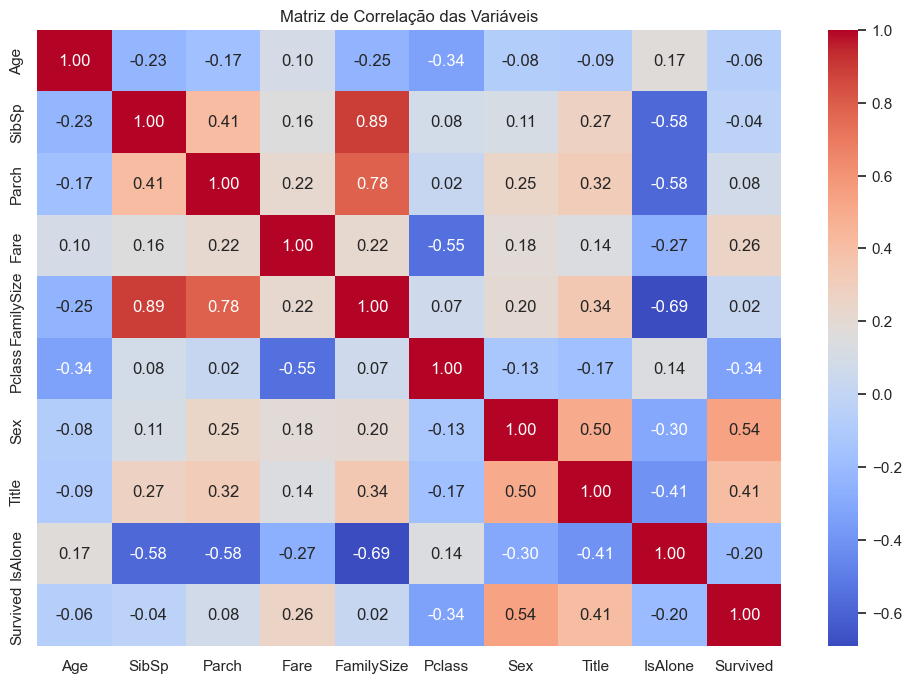

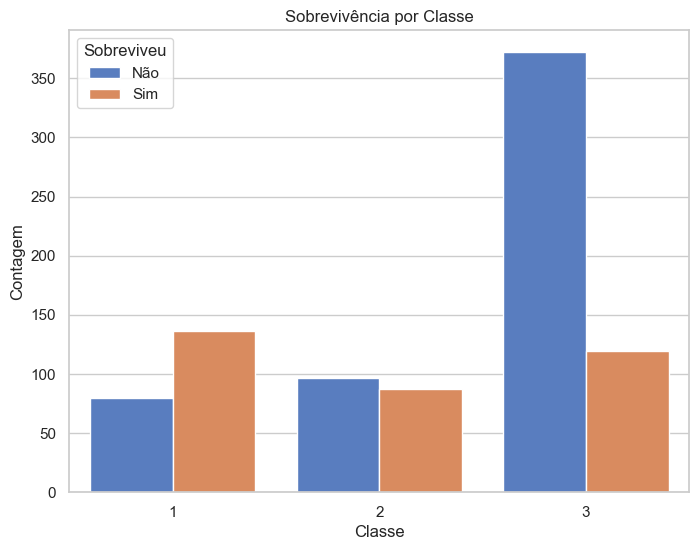

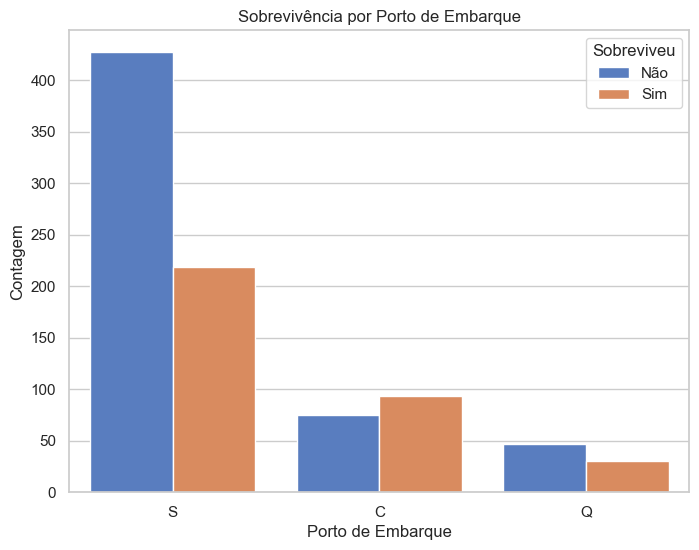

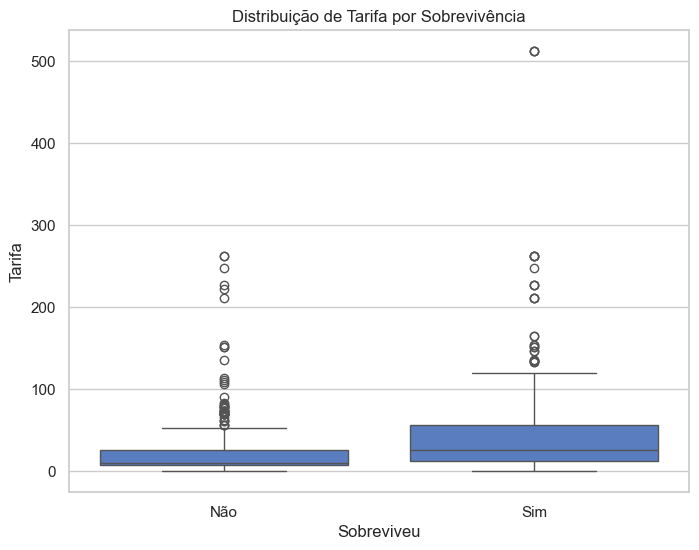

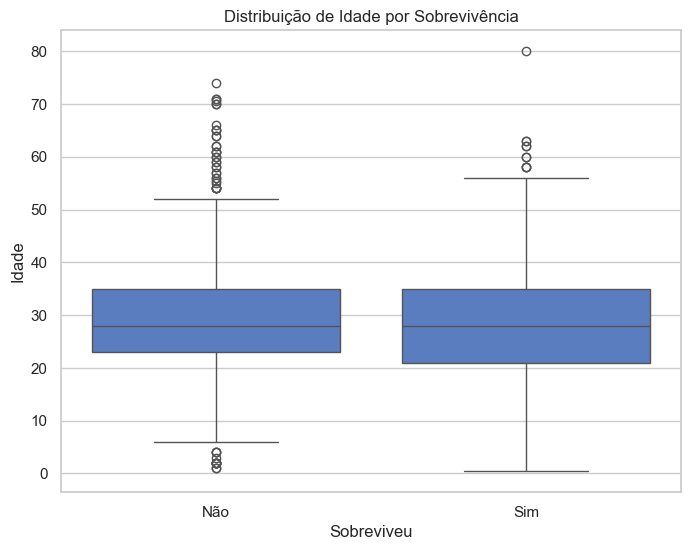

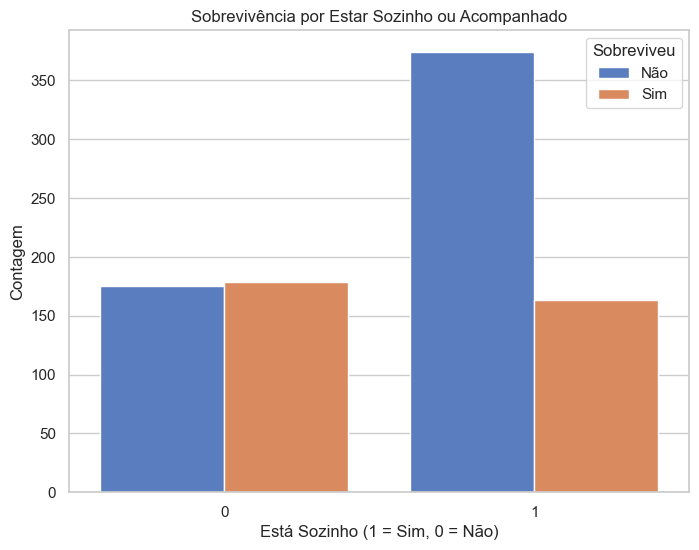

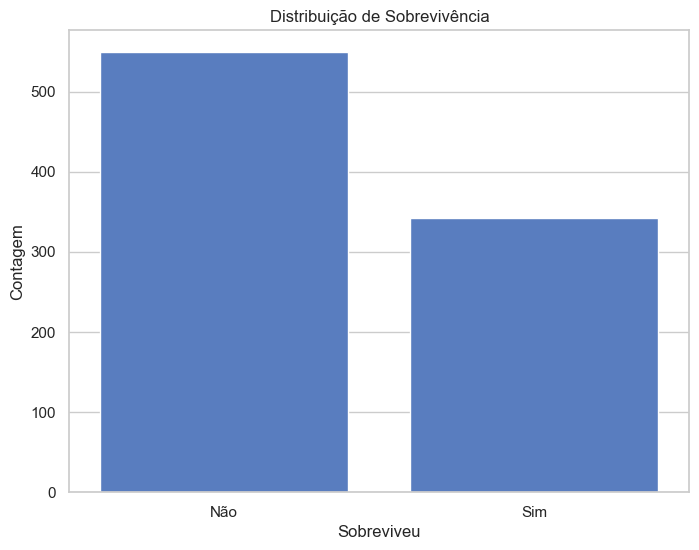

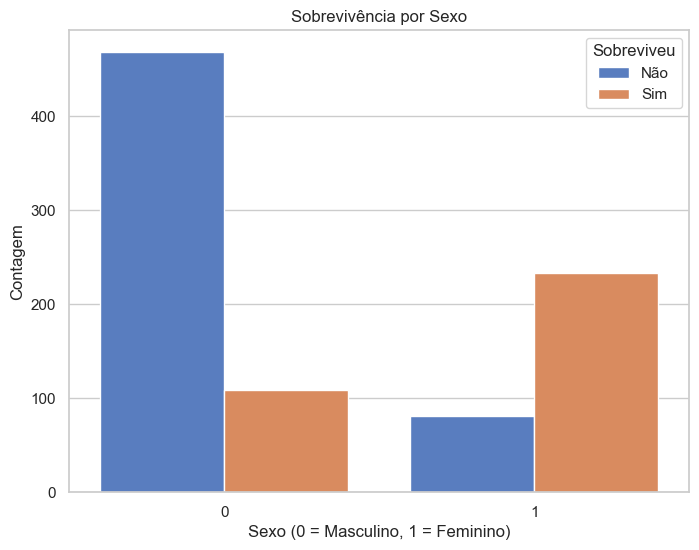

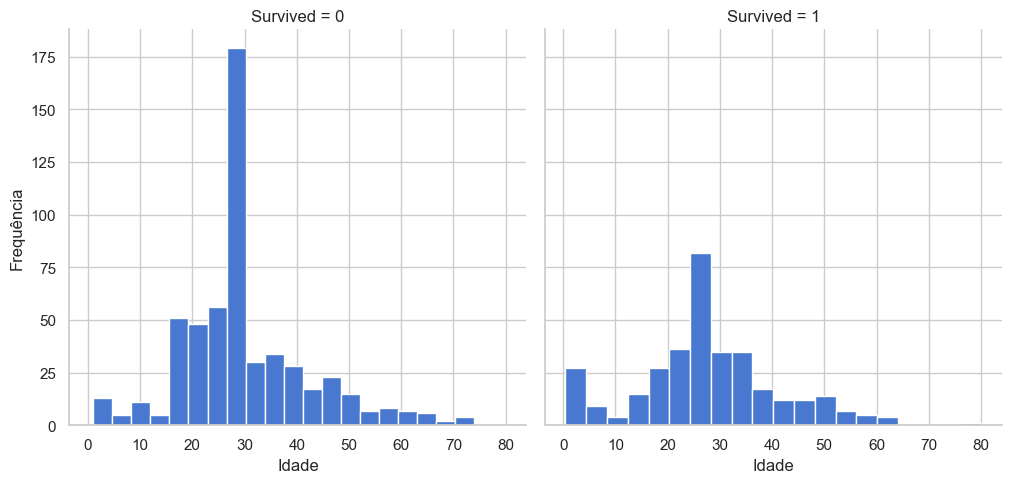

Acurácia Média (Regressão Logística): 0.8137
Acurácia Média (Árvore de Decisão): 0.7744
Acurácia Média (Random Forest): 0.8070
Acurácia Média (SVM): 0.6746


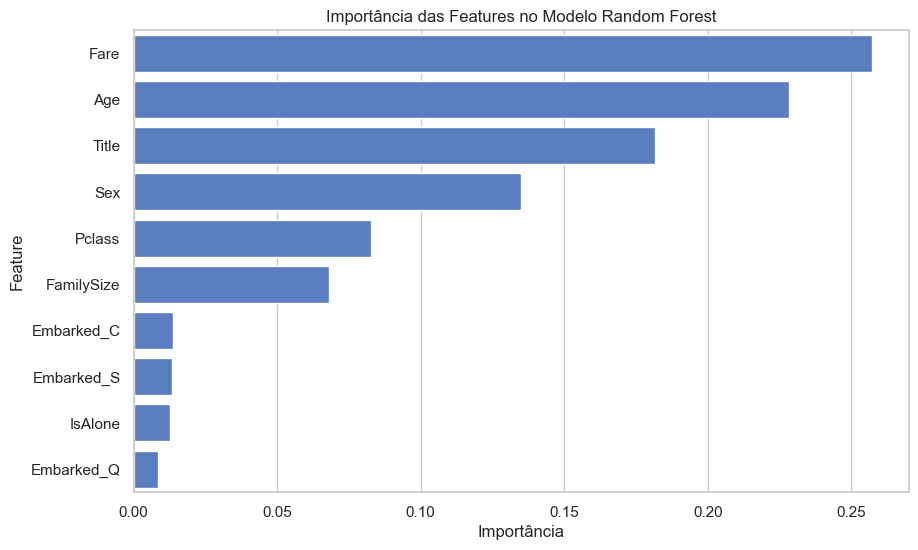

In [25]:
# Imputar idade com a mediana
train['Age'] = train['Age'].fillna(train['Age'].median())
test['Age'] = test['Age'].fillna(test['Age'].median())

# Imputar Embarked com a moda
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

# Imputar Fare no conjunto de teste
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

# Converter sexo em numérico
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
test['Sex'] = test['Sex'].map({'male': 0, 'female': 1})

# Criar dummies para Embarked
embarked_dummies_train = pd.get_dummies(train['Embarked'], prefix='Embarked')
embarked_dummies_test = pd.get_dummies(test['Embarked'], prefix='Embarked')

train = pd.concat([train, embarked_dummies_train], axis=1)
test = pd.concat([test, embarked_dummies_test], axis=1)

# Criar nova feature FamilySize
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

# Criar coluna IsAlone usando .loc para evitar o warning
# Para o conjunto de treinamento
train['IsAlone'] = 1  # Assume inicialmente que todos estão sozinhos
train.loc[train['FamilySize'] > 1, 'IsAlone'] = 0  # Se FamilySize > 1, não está sozinho

# Para o conjunto de teste
test['IsAlone'] = 1
test.loc[test['FamilySize'] > 1, 'IsAlone'] = 0

# Extrair título do nome (usando raw string)
train['Title'] = train['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
test['Title'] = test['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)

# Mapear títulos raros
title_mapping = {
    'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Dr': 5,
    'Rev': 5, 'Col': 5, 'Major': 5, 'Mlle': 2, 'Countess': 5,
    'Ms': 2, 'Lady': 5, 'Jonkheer': 5, 'Don': 5, 'Dona': 5,
    'Mme': 3, 'Capt': 5, 'Sir': 5
}
train['Title'] = train['Title'].map(title_mapping)
test['Title'] = test['Title'].map(title_mapping)

# Preencher títulos nulos com 0
train['Title'] = train['Title'].fillna(0)
test['Title'] = test['Title'].fillna(0)

# **Análises e Gráficos Adicionais**

# 1. Matriz de Correlação
numeric_features = ['Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'Pclass', 'Sex', 'Title', 'IsAlone']
corr_df = train[numeric_features + ['Survived']]
corr_matrix = corr_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Variáveis')
plt.savefig('Matriz_correlação_Variáveis')
plt.show()

# 2. Sobrevivência por Classe
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title('Sobrevivência por Classe')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.legend(title='Sobreviveu', labels=['Não', 'Sim'])
plt.savefig('Sobrevivência_classe.png')
plt.show()

# 3. Sobrevivência por Porto de Embarque
plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', hue='Survived', data=train)
plt.title('Sobrevivência por Porto de Embarque')
plt.xlabel('Porto de Embarque')
plt.ylabel('Contagem')
plt.legend(title='Sobreviveu', labels=['Não', 'Sim'])
plt.savefig('porto_embarque.png')
plt.show()

# 4. Distribuição de Fare por Sobrevivência
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Fare', data=train)
plt.title('Distribuição de Tarifa por Sobrevivência')
plt.xlabel('Sobreviveu')
plt.ylabel('Tarifa')
plt.xticks([0, 1], ['Não', 'Sim'])
plt.savefig('Fare_sobrevivencia.png')
plt.show()

# 5. Distribuição de Idade por Sobrevivência
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Age', data=train)
plt.title('Distribuição de Idade por Sobrevivência')
plt.xlabel('Sobreviveu')
plt.ylabel('Idade')
plt.xticks([0, 1], ['Não', 'Sim'])
plt.savefig('idade_sobrevivencia.png')
plt.show()

# 6. Sobrevivência por Estar Sozinho ou Acompanhado
plt.figure(figsize=(8, 6))
sns.countplot(x='IsAlone', hue='Survived', data=train)
plt.title('Sobrevivência por Estar Sozinho ou Acompanhado')
plt.xlabel('Está Sozinho (1 = Sim, 0 = Não)')
plt.ylabel('Contagem')
plt.legend(title='Sobreviveu', labels=['Não', 'Sim'])
plt.savefig('Sozinho_acompanhado.png')
plt.show()

# Gráfico de contagem de sobreviventes
plt.figure(figsize=(8, 6))
sns.countplot(x='Survived', data=train)
plt.title('Distribuição de Sobrevivência')
plt.xlabel('Sobreviveu')
plt.ylabel('Contagem')
plt.xticks([0, 1], ['Não', 'Sim'])
plt.savefig('contagem_sobreviventes.png')
plt.show()

# Sobrevivência por sexo
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex', hue='Survived', data=train)
plt.title('Sobrevivência por Sexo')
plt.xlabel('Sexo (0 = Masculino, 1 = Feminino)')
plt.ylabel('Contagem')
plt.legend(title='Sobreviveu', labels=['Não', 'Sim'])
plt.savefig('Sobrevivência_sexo.png')
plt.show()

# Histograma da idade por sobrevivência
g = sns.FacetGrid(train, col='Survived', height=5)
g.map(plt.hist, 'Age', bins=20)
g.set_axis_labels('Idade', 'Frequência')
g.add_legend()
plt.savefig('Histograma_idade_sobrevivência.png')
plt.show()

# **Modelagem**

# Selecionar features (incluindo 'IsAlone')
features = ['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'Title',
            'Embarked_C', 'Embarked_Q', 'Embarked_S', 'IsAlone']
X_train = train[features]
y_train = train['Survived']
X_test = test[features]

# Regressão Logística
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

logreg = LogisticRegression(max_iter=1000)
scores = cross_val_score(logreg, X_train, y_train, cv=5)
print(f'Acurácia Média (Regressão Logística): {scores.mean():.4f}')

# Árvore de Decisão
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
scores = cross_val_score(decision_tree, X_train, y_train, cv=5)
print(f'Acurácia Média (Árvore de Decisão): {scores.mean():.4f}')

# Random Forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(random_forest, X_train, y_train, cv=5)
print(f'Acurácia Média (Random Forest): {scores.mean():.4f}')

# SVM
from sklearn.svm import SVC

svc = SVC()
scores = cross_val_score(svc, X_train, y_train, cv=5)
print(f'Acurácia Média (SVM): {scores.mean():.4f}')

# Treinar o modelo final
random_forest.fit(X_train, y_train)

# **Análise de Importância das Features**

importances = random_forest.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Gráfico de Importância das Features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Importância das Features no Modelo Random Forest')
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.savefig('Importância_das_Features.png')
plt.show()

# Previsões no conjunto de teste
y_pred = random_forest.predict(X_test)

# Criar DataFrame com as previsões
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': y_pred
})

# Salvar em CSV
submission.to_csv('submission.csv', index=False)


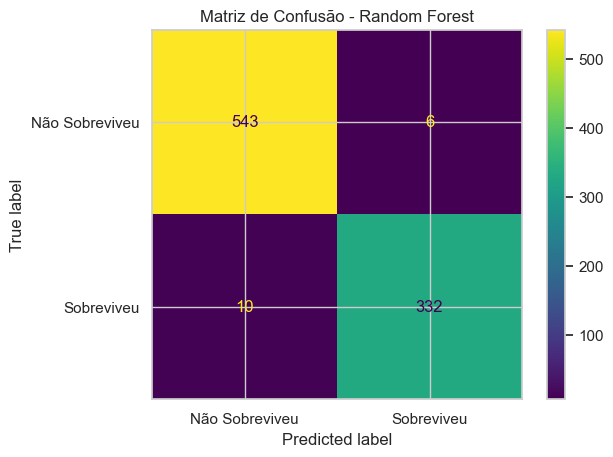

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Treinar o modelo
random_forest.fit(X_train, y_train)

# Previsões no conjunto de treinamento
y_train_pred = random_forest.predict(X_train)

# Matriz de Confusão
cm = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Não Sobreviveu', 'Sobreviveu'])
disp.plot()
plt.title('Matriz de Confusão - Random Forest')
plt.savefig('matriz_confusao_rf.png')  # Salvar o gráfico
plt.show()


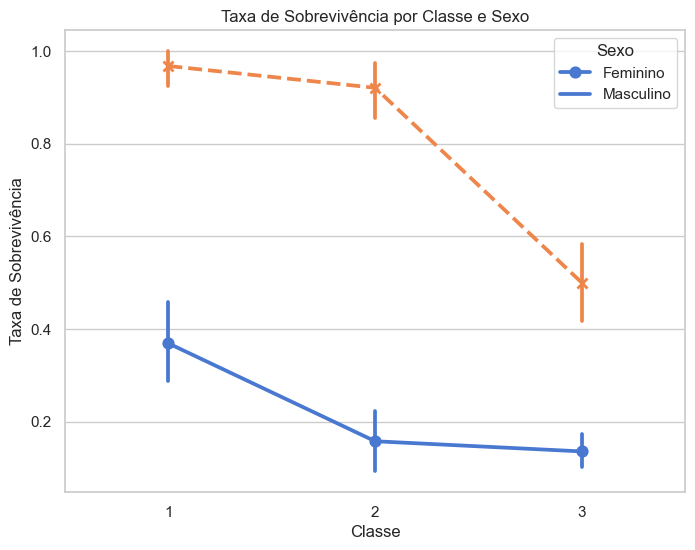

In [13]:
# Gráfico de interação entre Sexo e Classe
plt.figure(figsize=(8,6))
sns.pointplot(x='Pclass', y='Survived', hue='Sex', data=train,
              markers=['o', 'x'], linestyles=['-', '--'])
plt.title('Taxa de Sobrevivência por Classe e Sexo')
plt.xlabel('Classe')
plt.ylabel('Taxa de Sobrevivência')
plt.legend(title='Sexo', labels=['Feminino', 'Masculino'])
plt.savefig('interacao_sexo_classe.png')  # Salvar o gráfico
plt.show()


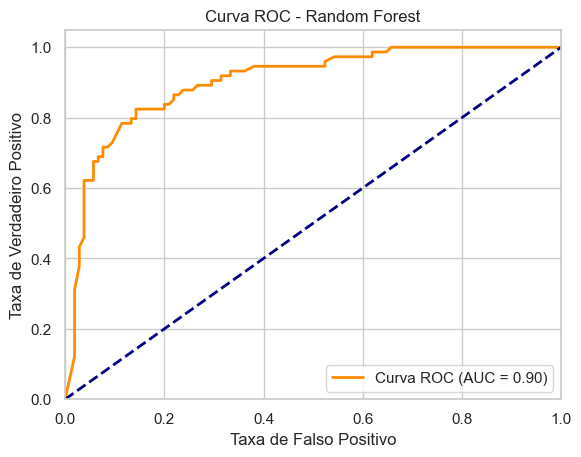

Acurácia no Conjunto de Validação: 0.8324


In [22]:
# Selecionar features
features = ['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'Title',
            'Embarked_C', 'Embarked_Q', 'Embarked_S', 'IsAlone']
X = train[features]
y = train['Survived']

# **Dividir o conjunto de dados em treinamento e validação**
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# **Treinar o modelo no conjunto de treinamento**
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# **Fazer previsões no conjunto de validação**
y_pred_proba = random_forest.predict_proba(X_val)[:,1]

# **Calcular a curva ROC**
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
roc_auc = auc(fpr, tpr)

# **Plotar a curva ROC**
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC - Random Forest')
plt.legend(loc="lower right")
plt.savefig('curva_roc_rf.png')  # Salvar o gráfico
plt.show()

# **Avaliar a acurácia no conjunto de validação**
from sklearn.metrics import accuracy_score

y_pred = random_forest.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f'Acurácia no Conjunto de Validação: {accuracy:.4f}')

# **Treinar o modelo final no conjunto completo**
random_forest.fit(X, y)

# **Prever no conjunto de teste**
X_test = test[features]
y_test_pred = random_forest.predict(X_test)

# Criar DataFrame com as previsões
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': y_test_pred
})

# Salvar em CSV
submission.to_csv('submission.csv', index=False)